<a href="https://www.kaggle.com/code/chandansingh98/customer-churn-prediction-87-accuracy?scriptVersionId=175799933" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import warnings
warnings.filterwarnings('ignore')


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
new_df = df.drop(labels = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [6]:
numeric_cols = new_df.select_dtypes(include = 'number').columns
print(numeric_cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


<Axes: >

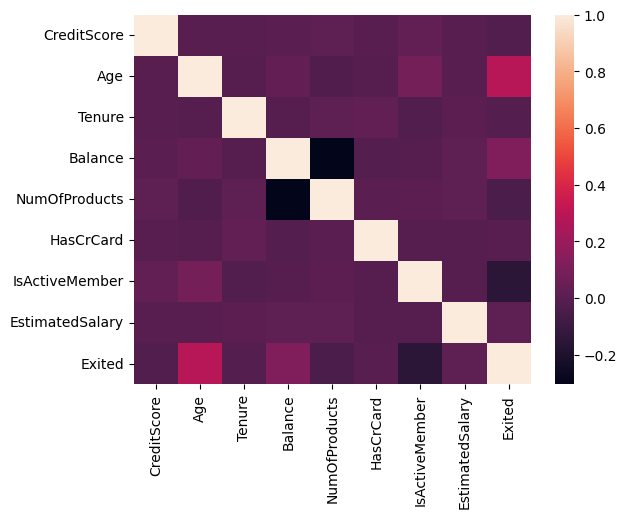

In [7]:
sns.heatmap(new_df[numeric_cols].corr())

In [8]:
new_df[numeric_cols].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [9]:
new_df[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Exploratory Data Analysis**

# 1. Credit Score

<Axes: ylabel='Density'>

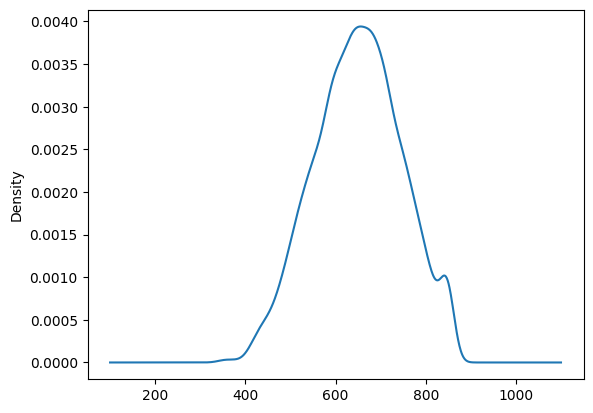

In [10]:
new_df['CreditScore'].plot(kind = 'kde')

In [11]:
new_df['CreditScore'].skew()

-0.07160660820092675

<Axes: >

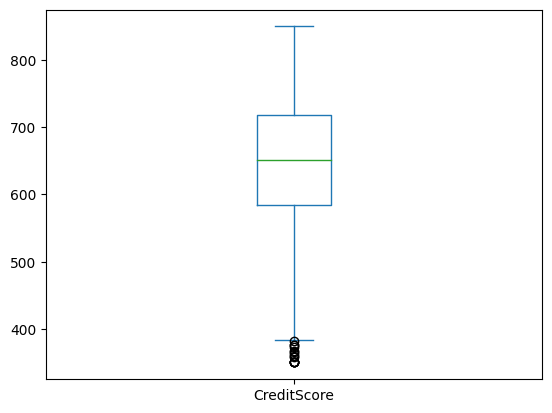

In [12]:
new_df['CreditScore'].plot(kind = 'box')

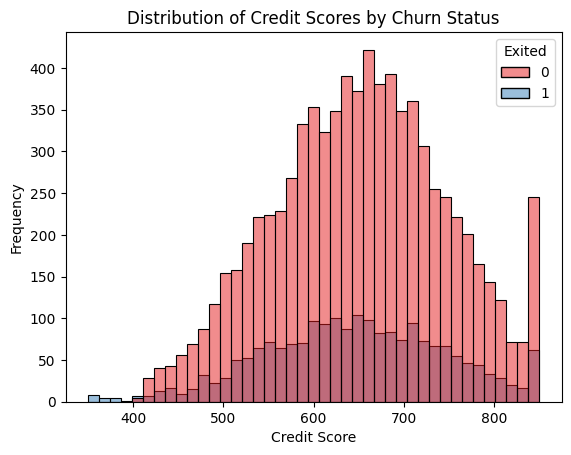

In [13]:
sns.histplot(data=new_df, x='CreditScore', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Credit Scores by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** 
* Credit Score column follows a normal distribution
* There is no strong relationship between creditscore and Customer churn although customers having credit score less than 400 haved churned.

# 2. Geography

<Axes: ylabel='count'>

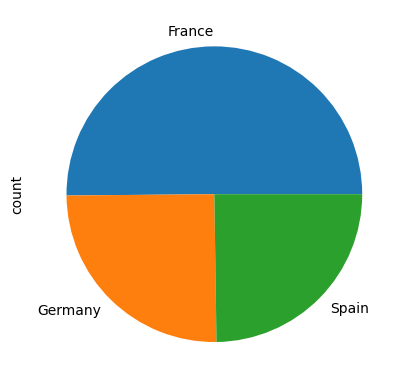

In [14]:
new_df['Geography'].value_counts().plot(kind = 'pie')

In [15]:
pd.crosstab(new_df['Exited'], new_df['Geography'], normalize = 'columns')* 100

Geography,France,Germany,Spain
Exited,,,
0,83.845233,67.556796,83.326605
1,16.154767,32.443204,16.673395


**Conclusion:**
* Out of all the customers around 50 % belong to France, 25% to Germany and 25% to Spain.
* Customer churn idealy should not depend on the place from where the customer belongs but according to data 32 % of the customers belonging to Germany have churned.

# 3. Gender

<Axes: ylabel='count'>

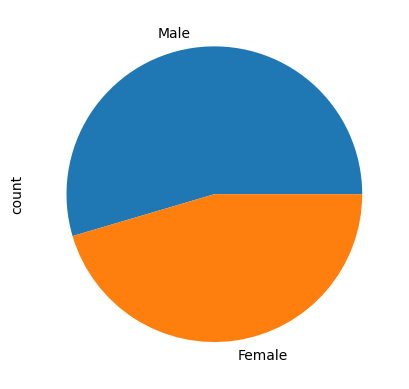

In [16]:
new_df['Gender'].value_counts().plot(kind = 'pie')

In [17]:
new_df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
pd.crosstab(new_df['Exited'], new_df['Gender'], normalize = 'columns') * 100

Gender,Female,Male
Exited,,
0,74.928461,83.544072
1,25.071539,16.455928


**Conclusion:**
* Based on the gender, females are more likely to churn than man with a churn rate of 25%.

# 4. Age

<Axes: ylabel='Density'>

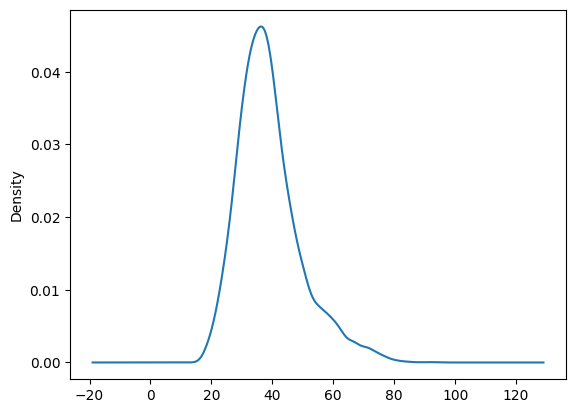

In [19]:
new_df['Age'].plot(kind = 'kde')

In [20]:
new_df['Age'].skew()

1.0113202630234552

<Axes: >

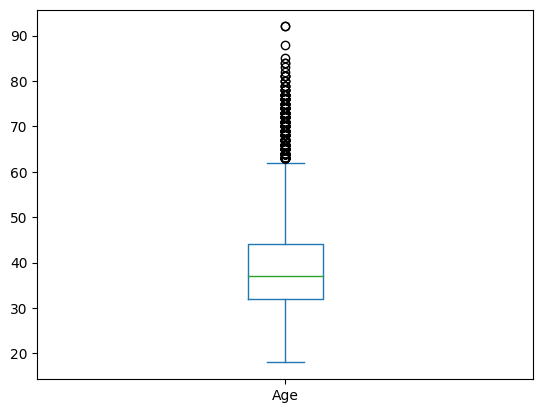

In [21]:
new_df['Age'].plot(kind = 'box')

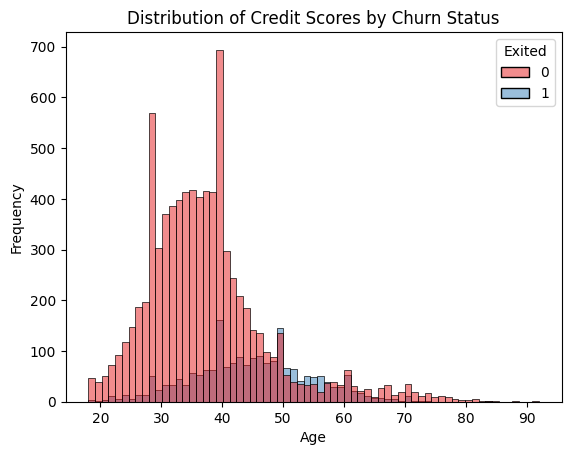

In [22]:
sns.histplot(data=new_df, x='Age', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Credit Scores by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Age column follows a slightly right skewed distribution.
* Age column contains large number of outliers
* It is evident that after 35 years of age the percentage of churned customer increases

# 5. Tenure

In [23]:
new_df['Tenure'].value_counts()/len(new_df) * 100

Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: count, dtype: float64

In [24]:
pd.crosstab(new_df['Exited'], new_df['Tenure'], normalize = 'columns') * 100

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,76.997579,77.584541,80.820611,78.88999,79.474216,79.347826,79.731127,82.782101,80.780488,78.353659,79.387755
1,23.002421,22.415459,19.179389,21.11001,20.525784,20.652174,20.268873,17.217899,19.219512,21.646341,20.612245


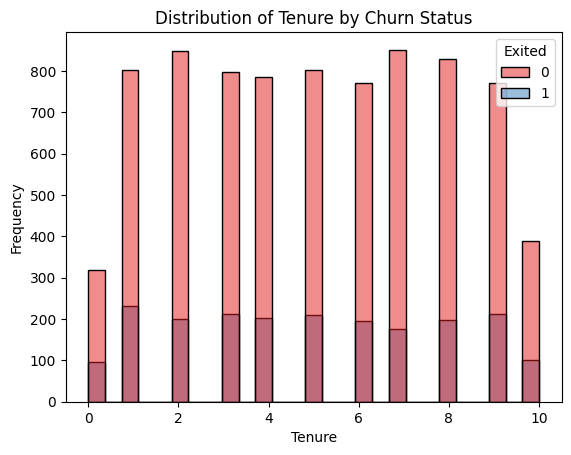

In [25]:
sns.histplot(data=new_df, x='Tenure', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* Highest customer churn rate are of that customers that have tenure of 0 years. As the tenure increases the churn rate is irregular, which shows there is not so much relationship between the Tenure and customer churn.

# 6. Balance

<Axes: ylabel='Density'>

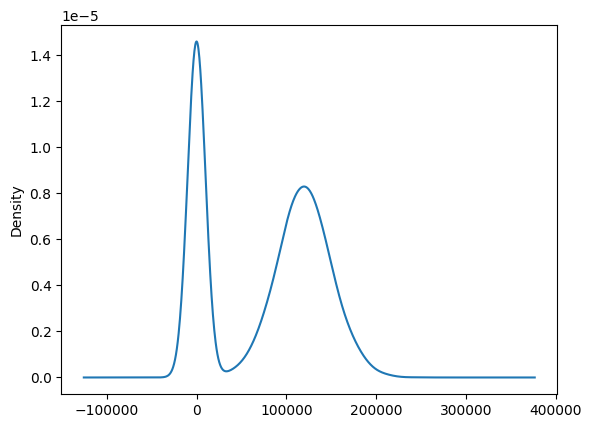

In [26]:
new_df['Balance'].plot(kind = 'kde')

In [27]:
new_df['Balance'].skew()

-0.14110871094154384

<Axes: >

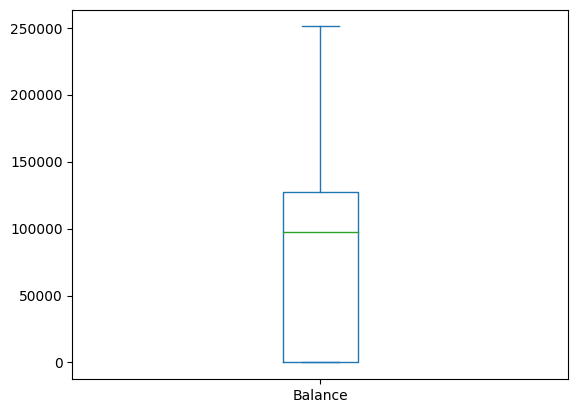

In [28]:
new_df['Balance'].plot(kind = 'box')

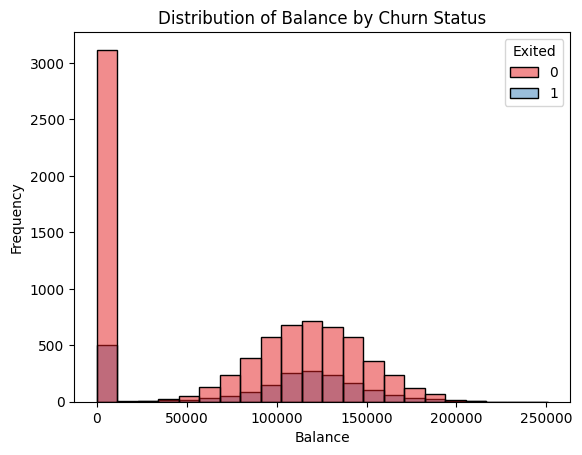

In [29]:
sns.histplot(data=new_df, x='Balance', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Balance by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* The Balance columns follows a bimodal normal distribution.
* Balance is not a strong indicator to predict whether a customer will churn or not.

# 7. Number of Products

In [30]:
new_df['NumOfProducts'].value_counts()/len(new_df) * 100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: count, dtype: float64

In [31]:
pd.crosstab(new_df['Exited'], new_df['NumOfProducts'], normalize = 'columns') * 100

NumOfProducts,1,2,3,4
Exited,,,,
0,72.285602,92.418301,17.293233,0.0
1,27.714398,7.581699,82.706767,100.0


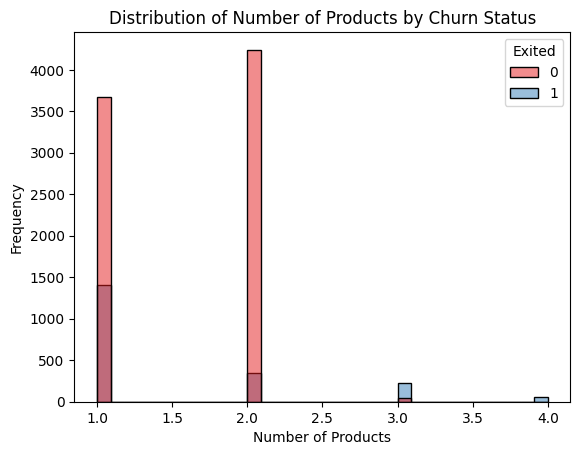

In [32]:
sns.histplot(data=new_df, x='NumOfProducts', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Number of Products by Churn Status')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* The analysis shows the number of products has a quite good relation with the customer churn rate. The customer churn rate is highest with the curstomers having 1 number of product i.e., 27.7% .

# 8. Has Credit Card

In [33]:
new_df['HasCrCard'].value_counts()/len(new_df) * 100

HasCrCard
1    70.55
0    29.45
Name: count, dtype: float64

In [34]:
pd.crosstab(new_df['Exited'], new_df['HasCrCard'], normalize = 'columns') * 100

HasCrCard,0,1
Exited,,
0,79.185059,79.815734
1,20.814941,20.184266


**Conclusion:**
* It is evident from the analysis that having credit card or not has no effect over the customer churn status.

# 9. Is Active member

In [35]:
new_df['IsActiveMember'].value_counts()/len(new_df) * 100

IsActiveMember
1    51.51
0    48.49
Name: count, dtype: float64

In [36]:
pd.crosstab(new_df['Exited'], new_df['IsActiveMember'], normalize = 'columns') * 100

IsActiveMember,0,1
Exited,,
0,73.149103,85.730926
1,26.850897,14.269074


**Conclusion:**
* The customers who are not active memeber are more likely to churn. Based on the data 26.85% of customers that are not active members have churned.

# 9. Estimated salary

<Axes: ylabel='Density'>

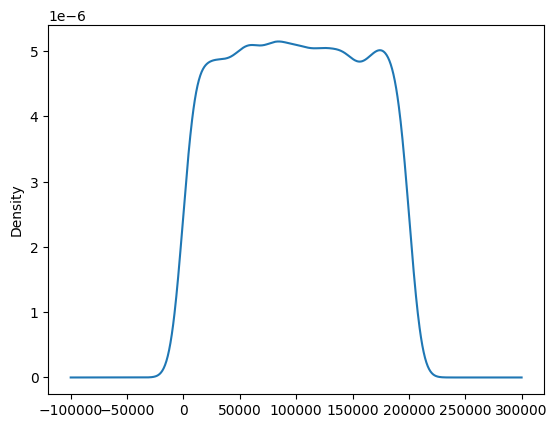

In [37]:
new_df['EstimatedSalary'].plot(kind = 'kde')

In [38]:
new_df['EstimatedSalary'].skew()

0.0020853576615585162

<Axes: >

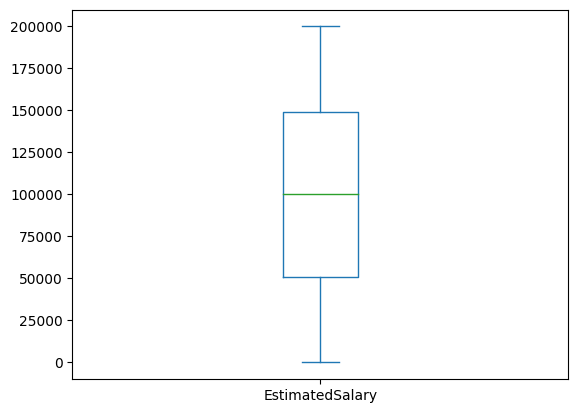

In [39]:
new_df['EstimatedSalary'].plot(kind = 'box')

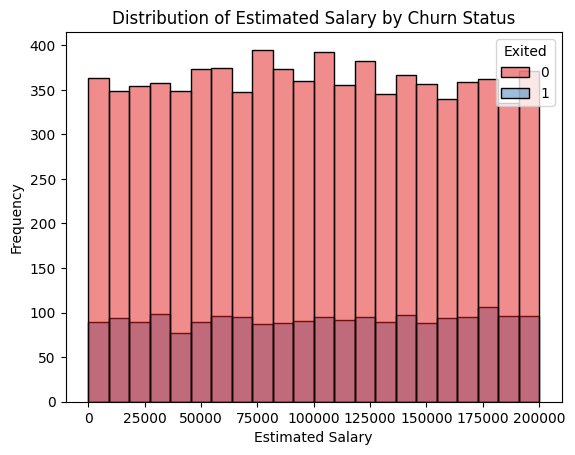

In [40]:
sns.histplot(data=new_df, x='EstimatedSalary', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Estimated Salary by Churn Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

**Conclusion:**
* The Estimated salary follows a normal distribution.
* The estimated salary has not much effect on customer churn status.

# Data Pre Processing

In [41]:
X = new_df.drop(labels = 'Exited', axis = 1)
y = new_df['Exited']

**Train Test Split**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

**One Hot Encoding of categorical columns**

In [43]:
cat_cols = X_train.select_dtypes(include = ['object']).columns.tolist()

In [44]:
encoder = OneHotEncoder(sparse_output = False)

encoder.fit(X_train[cat_cols])
encoded = encoder.transform(X_train[cat_cols])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))
one_hot_df.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train_encoded = pd.concat([X_train, one_hot_df], axis=1)
X_train_encoded = X_train_encoded.drop(cat_cols, axis=1)

In [45]:
X_train_encoded.shape

(7500, 13)

In [46]:
encoded = encoder.transform(X_test[cat_cols])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols))
one_hot_df.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test_encoded = pd.concat([X_test, one_hot_df], axis=1)
X_test_encoded = X_test_encoded.drop(cat_cols, axis=1)

In [47]:
X_test_encoded.shape

(2500, 13)

**Scaling**

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_encoded.columns)

In [49]:
X_test_scaled = scaler.transform(X_test_encoded)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_encoded.columns)

In [50]:
X_test_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.581635,-0.655146,-0.691649,0.327418,0.813111,-1.539736,-1.031152,-1.022827,-0.999467,1.730820,-0.577350,-0.911867,0.911867
1,-0.301120,0.392610,-1.385009,-1.221027,0.813111,0.649462,0.969789,0.794069,1.000533,-0.577761,-0.577350,-0.911867,0.911867
2,-0.529688,0.487861,-0.344970,-1.221027,0.813111,0.649462,-1.031152,-0.731457,-0.999467,-0.577761,1.732051,1.096651,-1.096651
3,-1.516684,1.916619,1.041750,0.686762,0.813111,0.649462,0.969789,1.216203,-0.999467,1.730820,-0.577350,-0.911867,0.911867
4,-0.955654,-1.131399,0.695070,0.780331,-0.911043,0.649462,0.969789,0.243229,-0.999467,-0.577761,1.732051,1.096651,-1.096651


# Model Building

In [51]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}

In [52]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))
    print('-' * 15)

Logistic Regression Accuracy: 80.72%
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.54      0.20      0.29       497

    accuracy                           0.81      2500
   macro avg       0.68      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500

Confusion Matrix:
 [[1920   83]
 [ 399   98]]
ROC AUC Score: 0.7740240745521557
---------------
Decision Tree Accuracy: 80.28%
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2003
           1       0.50      0.51      0.51       497

    accuracy                           0.80      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.80      0.80      0.80      2500

Confusion Matrix:
 [[1752  251]
 [ 242  255]]
ROC AUC Score: 0.6938832194364389
---------------
Support Vector Classifier Accuracy: 85.56%
              precision    recall  f1-score

As the last model is Gradient Boosting Classifier we can check the training accuracy of the model.

In [53]:
y_train_pred = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_train_pred)
print(accuracy)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

0.8733333333333333
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5960
           1       0.81      0.50      0.62      1540

    accuracy                           0.87      7500
   macro avg       0.85      0.73      0.77      7500
weighted avg       0.87      0.87      0.86      7500

Confusion Matrix:
 [[5786  174]
 [ 776  764]]


**Among all the models tested, the Gradient Boosting Classifier has the highest accuracy and ROC AUC score of 0.86. With a training accuracy of 87.33% and a test accuracy of 87.20%, it is clear that the model is neither overfitting nor underfitting.**